<a href="https://colab.research.google.com/github/aaa0034213/2024-1-my-BDA/blob/main/inclass/06w_0409_B_ch07_missingvalue_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1


In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

In [4]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.7 MB/s eta 0:00:00


In [5]:
%%html
<!--마크다운 표 정렬 설정-->
<style> table {float:left} </style>

In [6]:
pd.set_option('display.precision', 2)

In [7]:
!git clone http://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.54 MiB/s, done.


In [8]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(frac=.2)

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
4,5,2,25,80,65
14,15,4,75,56,78


# 07 데이터 정제 - 빠진 데이터, 이상한 데이터 제거하기

In [9]:
df = pd.DataFrame({'sex':['M','F',np.nan,'M','F'],
                   'score': [5,4,3,4,None]})

df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [10]:
df.score + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

## 결측치 확인하기 (시험)

In [13]:
pd.isna(df)      # 결측치 True = nan , False = 값

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [15]:
df.isna()    # 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [17]:
pd.isnull(df)      # 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [19]:
pd.notna(df)      # 반대로

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [22]:
pd.notnull(df)    # 반대로

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [24]:
df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [23]:
df.isna().sum()   # 논리값 True = 1 , False = 0

sex      1
score    1
dtype: int64

In [25]:
pd.isna(df).sum(axis=0)

sex      1
score    1
dtype: int64

In [27]:
pd.isna(df).sum(axis=1)    # 행별로 더함

0    0
1    0
2    1
3    0
4    1
dtype: int64

In [32]:
s = pd.Series([True, False, True, False])
s

0     True
1    False
2     True
3    False
dtype: bool

In [29]:
s.sum()

2

In [30]:
s.any()     # 하나만 True 면 True.

True

In [33]:
s.all()     # 모두 다 True 여야 True

False

In [34]:
s = pd.Series([True, True, True, True])
s

0    True
1    True
2    True
3    True
dtype: bool

In [35]:
s.all()

True

In [36]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [37]:
df.isna().any()       # asix = 0 같음 (열)

sex      True
score    True
dtype: bool

In [39]:
b = df.isna().any(axis= 1)  #  행

In [40]:
b

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [41]:
df[b]

,sex,score
2,NaN,3.0
4,F,NaN


In [42]:
# 적어도  nan이 하나라도 있는 행을 추출.      (중요)

df[df.isna().any(axis= 1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [45]:
df[~df.isna().any(axis= 1)]       # 반대로 nan 행이 하나도 없는 행 추출.    (중요)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [47]:
df[df.notna().all(axis= 1)]       # 반대로 nan 행이 하나도 없는 행 추출.

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [48]:
df[~df.notna().all(axis= 1)]      # 적어도  nan이 하나라도 있는 행을 추출.

,sex,score
2,NaN,3.0
4,F,NaN


## 결측값 시각화
- [패키지 missingno](https://github.com/ResidentMario/missingno)

In [52]:
df.isnull()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


<Axes: >

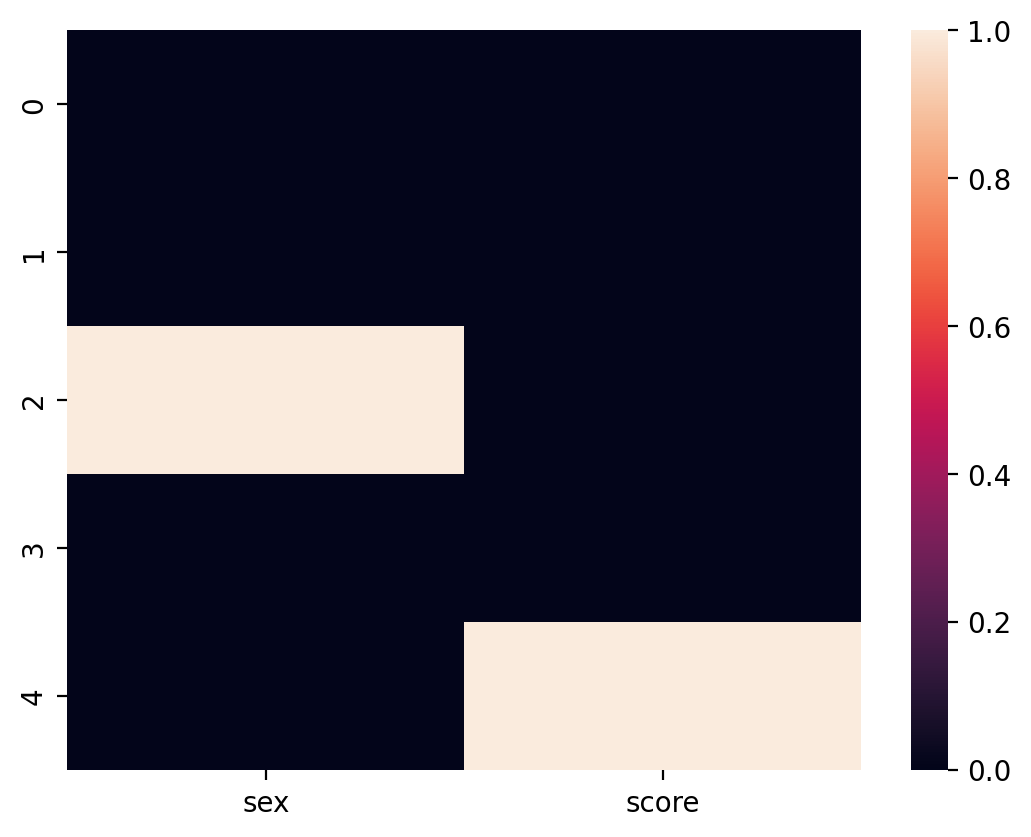

In [49]:
import seaborn as sns

sns.heatmap(df.isnull())

<Axes: >

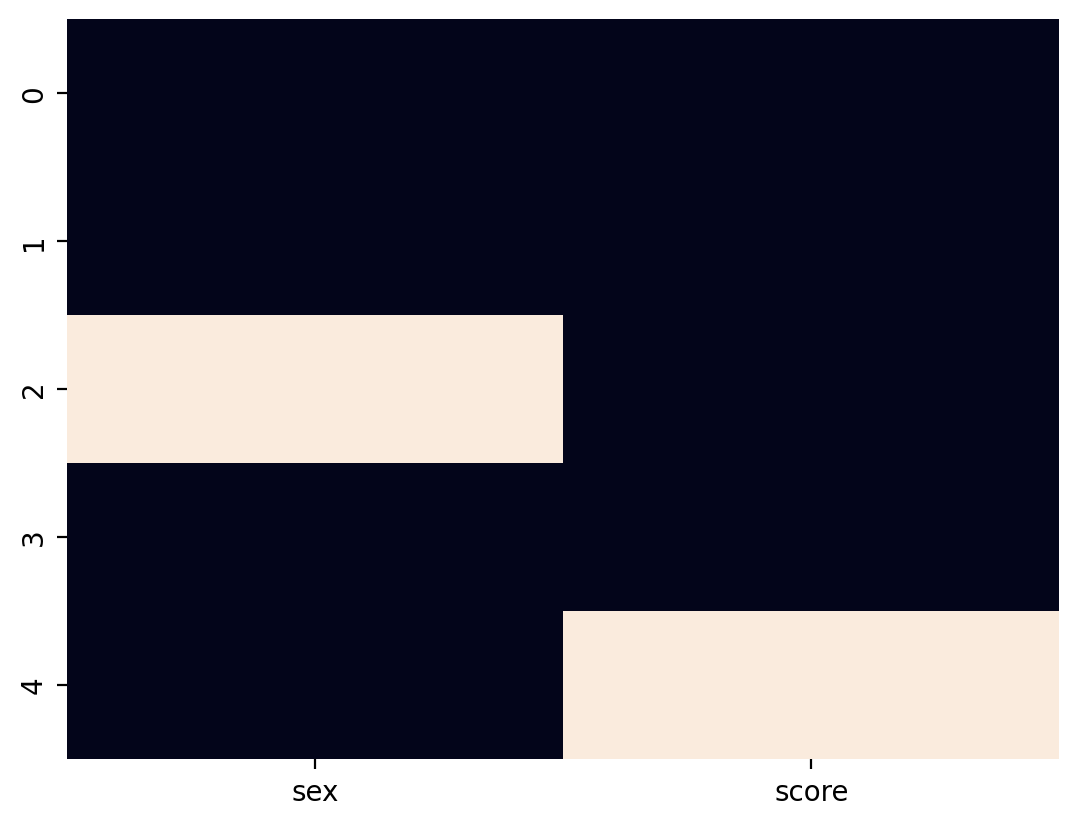

In [53]:
sns.heatmap( df.isnull(), cbar = False )         # 옆에 바 없애기

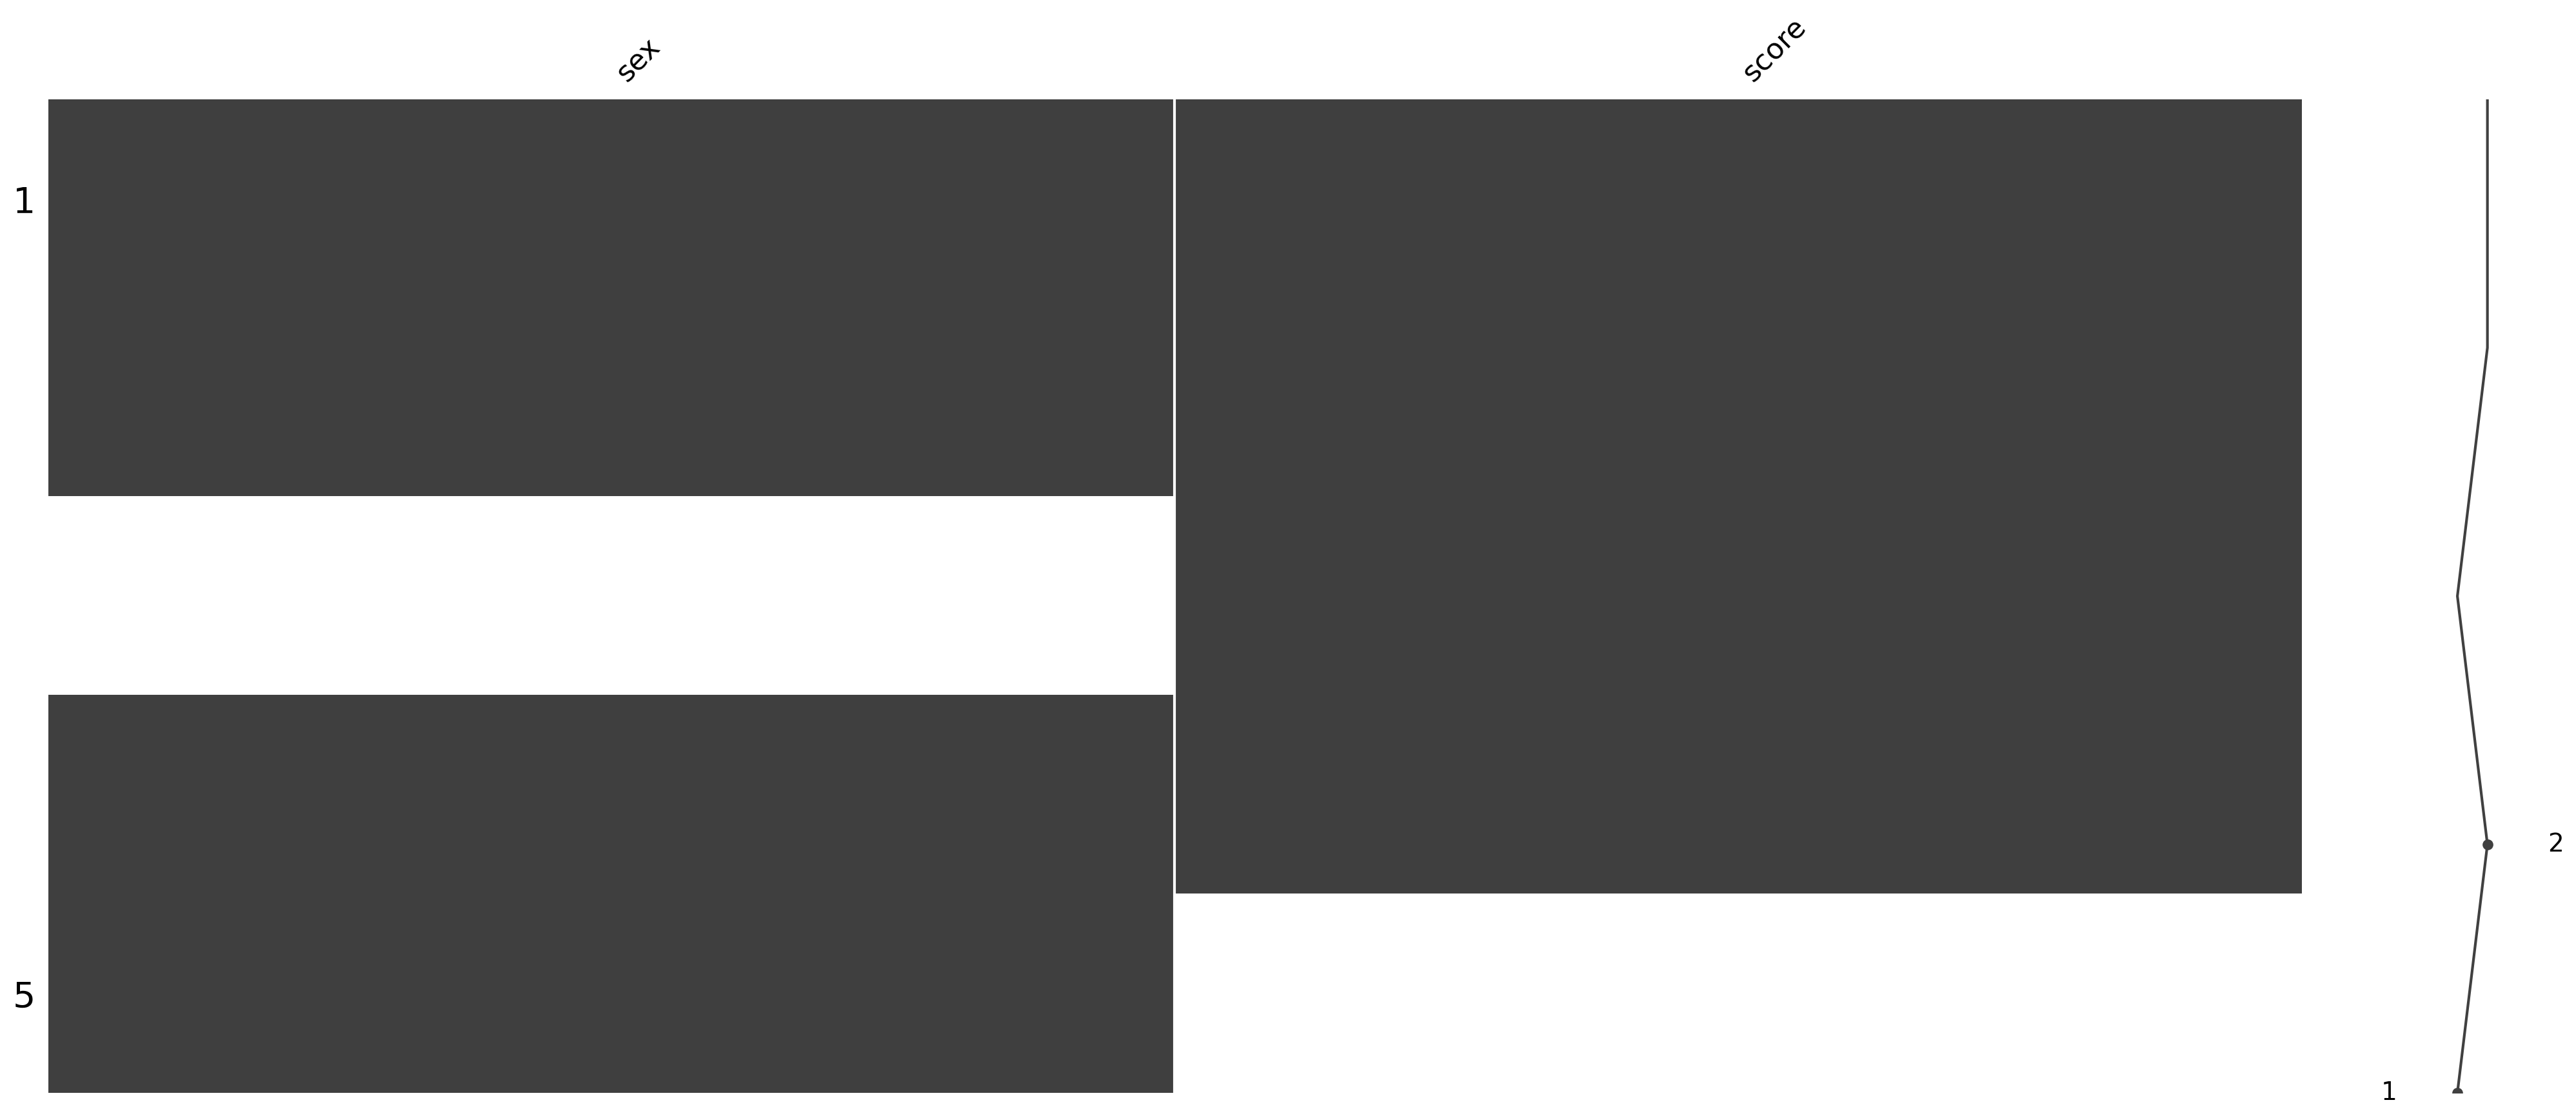

In [56]:
import missingno as msno
msno.matrix(df);

In [ ]:
tdf = sns.load_dataset('titanic')
msno.matrix(tdf)

In [61]:
tdf2 = tdf.sample(20)
tdf2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
354,0,3,male,NaN,0,0,7.22,C,Third,man,True,NaN,Cherbourg,no,True
569,1,3,male,32.0,0,0,7.85,S,Third,man,True,NaN,Southampton,yes,True
705,0,2,male,39.0,0,0,26.00,S,Second,man,True,NaN,Southampton,no,True
273,0,1,male,37.0,0,1,29.70,C,First,man,True,C,Cherbourg,no,False
708,1,1,female,22.0,0,0,151.55,S,First,woman,False,NaN,Southampton,yes,True
104,0,3,male,37.0,2,0,7.92,S,Third,man,True,NaN,Southampton,no,False
869,1,3,male,4.0,1,1,11.13,S,Third,child,False,NaN,Southampton,yes,False
840,0,3,male,20.0,0,0,7.92,S,Third,man,True,NaN,Southampton,no,True
102,0,1,male,21.0,0,1,77.29,S,First,man,True,D,Southampton,no,False
425,0,3,male,NaN,0,0,7.25,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
import missingno as msno
msno.matrix(tdf2)

## 위 내용 정리
- 오른쪽의 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세트에서 최대 및 최소 널링이 있는 행을 가르킴
  - 행마다 15개중 nan 이 아닌 유효한 데이터 갯수를 나타냄
  - 그 점을 다음 행과 연결한 선


In [63]:
# 열 embarked 가 nan 행 추출

tdf[tdf.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [65]:
# 두 열 age, deck 이 모두 nan 인 행 추출

tdf[(tdf.age.isna())& (tdf.deck.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.00,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.22,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.22,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.88,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.23,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.50,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.90,S,Third,man,True,NaN,Southampton,no,True


In [68]:
# 세 개 열 age, deck, embark_town  이 모두 nan 인 행 추출

tdf[(tdf.age.isna())& (tdf.deck.isna())&(tdf.embark_town.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [69]:
# 최소한 1개의  nan에 있는 행 추출
tdf[tdf.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.07,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.05,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.12,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False


### 결측치 제거하기

In [71]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [75]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [72]:
df.dropna(subset = ['score'])       # 스코어 행에서 nan 삭제 ( 결측치 삭제)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [73]:
df.dropna(subset = ['sex'])         # sex 행에서 NaN 삭제

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0
4,F,NaN


In [77]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [78]:
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [80]:
df.dropna(subset= ['sex'] , axis =0 )

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0
4,F,NaN


In [82]:
# 행 2에 NaN이 있으면 열을 제거

df.dropna(subset = [2], axis = 1)

,score
0,5.0
1,4.0
2,3.0
3,4.0
4,NaN


In [84]:
# 행 3에 NaN이 있으면 열을 제거

df.dropna(subset = [3], axis = 1)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [87]:
# 행 4에 NaN이 있으면 열을 제거

df.dropna(subset = [4], axis = 1)

,sex
0,M
1,F
2,NaN
3,M
4,F


In [88]:
df.dropna(axis= 1)      # 빈 데이터 프레임이 표시됨

""
0
1
2
3
4


In [89]:
df.dropna(axis= 1).empty        # empty 비어있으면 True

True

In [90]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [91]:
df['score'].mean()      # 결측치빼고 계산.

4.0

In [93]:
df['score'].sum()    # 결측치빼고 계산.

16.0

In [94]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


## pandas 문서

In [96]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman',np.nan],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip',np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT,pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [97]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [101]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True
3,True,True,True


In [102]:
df.dropna(axis = 'columns')     # 열에 다 True 가 있어 전부 삭제됨 axis =1 같음

""
0
1
2
3


In [103]:
# 모든 값이 NaN 인 경우 행 제거

df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [104]:
df.dropna(how = 'any')      # 하나라도 NaN인 경우 행 제거

,name,toy,born
1,Batman,Batmobile,1940-04-25


### 결측치 대체하기

In [ ]:
exam = pd.read_csv('data/exam.csv')
exam.loc[[2,7,14],['math']] = np.nan
exam

In [107]:
exam.mean()

id         10.50
nclass      3.00
math       55.24
english    84.90
science    59.45
dtype: float64

In [108]:
exam.math.mean()

55.23529411764706

In [112]:
exam.loc[[2,7,14],['math']]

,math
2,NaN
7,NaN
14,NaN


## 결측값 채워넣기 fillna()

In [113]:
exam.math = exam.math.fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [118]:
pd.set_option('display.precision',2)
exam.math = exam.math.fillna(exam['math'].mean())
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


### 07-2 이상한 데이터 찾기 - 이상치 정제하기

In [120]:
df = pd.DataFrame({'sex' : [1,2,1,3,2,1],
                   'score' : [5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [121]:
df['sex'].value_counts()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [122]:
df['score'].value_counts()

score
4    2
5    1
3    1
2    1
6    1
Name: count, dtype: int64

In [124]:
# sex가 3이면 NaN 부여

df['sex'] = np.where(df['sex']== 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [125]:
# score 가 5보다 크면 NaN 부여하기

df['score'] = np.where(df['score']>5, np.nan,df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [127]:
# sex, score 결측치 제거,  sex별 분리,  score 평균 구하기

df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [128]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)  # 조건에 맞으면 문자를 부여함.
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [129]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [130]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞으면 문자열 부여
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [131]:
df.isna()   ## missing value 인식 못함.        위에 문자열이 들어가서 nan 문자열로 판단됨

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [133]:
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [134]:
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


### 이상치 제거하기 - 극단적인 값

In [136]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
91,ford,mustang,3.8,1999,6,auto(l4),r,18,25,r,subcompact
152,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,20,p,suv
57,dodge,durango 4wd,3.9,1999,6,auto(l4),4,13,17,r,suv
76,ford,expedition 2wd,5.4,2008,8,auto(l6),r,12,18,r,suv


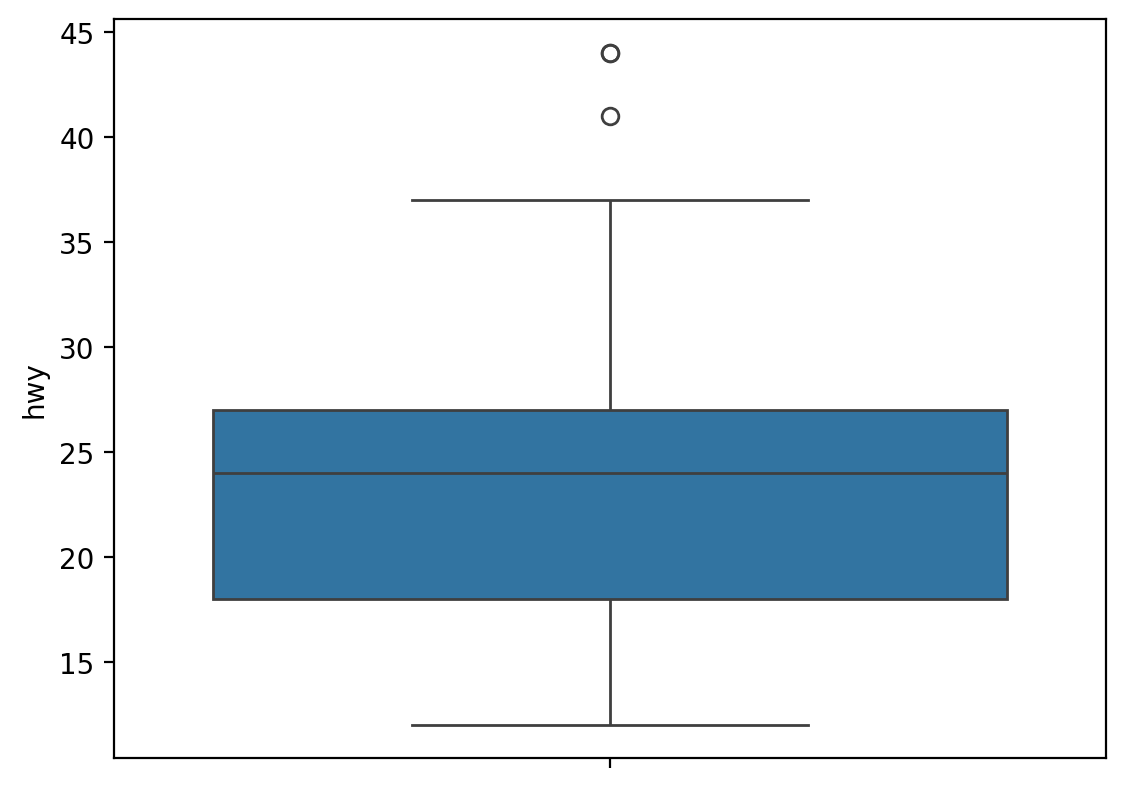

In [137]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

In [139]:
mpg.hwy.describe()

count    234.00
mean      23.44
std        5.95
min       12.00
25%       18.00
50%       24.00
75%       27.00
max       44.00
Name: hwy, dtype: float64

In [140]:
s = pd.Series([1,2,3,4,5])

In [142]:
s.quantile([.25,.5,.75])

0.25    2.0
0.50    3.0
0.75    4.0
dtype: float64

In [144]:
s.quantile([.25, .5, .75, 1])

0.25    2.0
0.50    3.0
0.75    4.0
1.00    5.0
dtype: float64

In [145]:
pct25, pct75 = mpg['hwy'].quantile([.25,.75])

In [146]:
pct25

18.0

In [147]:
pct75

27.0

### IQR (Interquartile range)구하기

In [149]:
iqr = pct75 - pct25
iqr

9.0

### 상한, 하한 구하기

In [154]:
pct25 - 1.5*iqr     # 하한

4.5

In [155]:
pct75 + 1.5*iqr     # 상한

40.5

In [156]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [ ]:
import missingno as msno
msno.matrix(mpg);

### 3. 이상값을 결측 처리하기

In [165]:
# 4.5 ~ 40.5 벗어나면 NaN 값을 부여

mpg['hwy'] = np.where((mpg['hwy']<4.5)|(mpg['hwy'] > 40.5), np.nan,mpg['hwy'])

In [166]:
mpg['hwy'].isna().sum()   # 결측치 빈도 확인.

3

In [167]:
dmpg = mpg.dropna(subset=['hwy'])       # 결측치 제거
len(dmpg)

231

In [159]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

234

In [168]:
dmpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [169]:
mpg.groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [170]:
dmpg.groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [171]:
dmpg.shape[1]

11

In [172]:
len(dmpg)

231

### 정리하기

In [ ]:
  ## 1. 결측치 정제하기
  df = pd.DataFrame({'sex':['1,2,1,3,2,1'],
                     'score':[5,4,3,4,2,6]})

  pd.isna(df).sum()                           # 결측치 확인
  df_nomiss = df.dropna(subset = ['score'])   # 결측치 제거
  df_nomiss = df.dropna(subset = ['score','sex']) # 여러 번수 동시에 결측치 제거

  ## 2. 이상치 정제하기

  # 이상치 확인
  df['sex'].value_counts(sort= False)

  # 이상치 결측 처리
  df['sex'] = np.where(df['sex'] == 3 , np,nan, df['sex'])      # sex == 3 일 때 NaN으로 변경

  # 상자 그림으로 극단치 기준값 찾기

  pct25 = mpg['hwy'].quantile(.25)    # 1사분위수
  pct75 = mpg['hwy'].quantile(.75)    # 3사분위수
  iqr = pct75 - pct25                 # IQR
  pct25 - 1.5 * iqr                   # 하한
  pct75 + 1.5 * iqr                   # 상한

  # 극단치 결측 처리

  mpg['hwy'] = np.where((mpg['hwy']<4.5)|(mpg['hwy']>40.5), np.nan, mpg['hwy'])